# Clasificación de textos económicos

En este estudio de hace una clasificación de textos económicos en base a un algoritmo de clústering.

En primer lugar se cargan los datos, que contienen noticias económicas recolectadas entre abril y octubre de 2020. Además, se filtran los datos para tener sólo textos que provengan de noticias, y para eliminar las filas con missing values.

In [23]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_columns', 20) # número máximo de columnas a mostrar en el terminal
pd.set_option('display.max_rows', 100) # número máximo de filas a mostrar en el terminal

dataset = pd.read_csv('Sentimientos.csv')
dataset = dataset[dataset['fuente'] != 'memoria']
dataset = dataset.dropna().reset_index(drop=True)
dataset.head()

,month,year,fuente,sentimiento,response,empresa,texto
0,4,2020.0,noticia,negativo,-1.0,.,Economía global anotaría en 2020 su peor año d...
1,4,2020.0,noticia,negativo,-1.0,.,Goldman Sachs prevé una crisis cuatro veces pe...
2,4,2020.0,noticia,positivo,1.0,.,Amazon logra su máxima cotización histórica en...
3,4,2020.0,noticia,negativo,-1.0,.,"Sin embargo, este incremento súbito del volume..."
4,4,2020.0,noticia,positivo,1.0,.,Venta online de productos para mascotas aument...


Luego se examina el tamaño de los datos. Se observa que la base de datos tiene 826 filas y 7 variables. 

In [15]:
print('Dimensiones de los datos: \n', dataset.shape, '\n')
print(dataset.info())

Dimensiones de los datos: 
 (826, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        826 non-null    object 
 1   year         826 non-null    float64
 2   fuente       826 non-null    object 
 3   sentimiento  826 non-null    object 
 4   response     826 non-null    float64
 5   empresa      826 non-null    object 
 6   texto        826 non-null    object 
dtypes: float64(2), object(5)
memory usage: 45.3+ KB
None


Al explorar el tamaño de los textos, se observa que el texto más largo tiene 14.172 carácteres, mientras que el texto más corto tiene 258 carácteres.

In [16]:
data = dataset.texto
text_len = data.str.len()
print('Noticia más larga: \n', max(text_len), '\n')
print('Noticia más corta: \n', min(text_len), '\n')

Noticia más larga: 
 14172 

Noticia más corta: 
 258 



A continuación se muestra una noticia seleccionada aleatoriamente de la base de datos

In [19]:
k = np.random.randint(0, len(data))
print('Noticia %d :' % (k), '\n', data[k])

Noticia 431 : 
 La economía estadounidense sumó 4,8 millones de puestos de trabajo en junio y la tasa de desempleo cayó más de dos puntos a 11,1% a medida que muchos comercios reabrieron, según los datos publicados este jueves por el Departamento de Trabajo.

Sin embargo, la recuperación está amenazada en un momento en que hay un alza de los casos de Covid-19 en el sur y el oeste del país que podría generar más despidos y este informe sólo recoge datos hasta la primera mitad del mes.

Otro informe mostró que se registraron 1,43 millones de despidos, según los datos semanales de las nuevas peticiones de subsidio por desempleo.

La tasa de desempleo confirmó un segundo mes a la baja, superando las expectativas de los analistas, pero este indicador depende al igual que el conjunto de la economía de que se controle la pandemia que en Estados Unidos provocó el brote más grave con más de 128.000 muertos.

El confinamiento para intentar contener el avance del virus llevó a la tasa de desemple

A continuación se carga una lista de Stopwords en español, que son palabras comunes en español y que no tienen un significado por sísolas, por ejemplo, artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

In [20]:
sw = pd.read_csv('spanish.txt', header=None, names=['stopwords'])
stopwords = sw['stopwords'].tolist()

El siguiente paso es crear una función que preprocesa los datos aplicando diversos filtros:
- Se transforman las mayúsculas en minúsculas.
- Se eliminan los números.
- Se elimina una lista de carácteres especiales.
- Se eliminan las stopwords.

In [21]:
import nltk
import re

def preprocess(s):
    s = s.lower()
    s = re.sub('[0-9]+', '', s) 
    s = re.sub('[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t—’‘“”]', '', s)
    tokens = nltk.tokenize.word_tokenize(s) 
    tokens = [t for t in tokens if t not in stopwords] 
    jtokens = ' '.join(tokens)
    return jtokens 

pdata = [preprocess(t) for t in data]

A continuación se muestra la noticia anterior luego del preprocesamiento:

In [22]:
print('Noticia %d :' % (k), '\n', pdata[k])

Noticia 431 : 
 economía estadounidense sumó millones puestos trabajo junio tasa desempleo cayó dos puntos medida comercios reabrieron según datos publicados jueves departamento trabajo embargo recuperación amenazada momento alza casos covid sur oeste país podría generar despidos informe sólo recoge datos primera mitad mes informe mostró registraron millones despidos según datos semanales nuevas peticiones subsidio desempleo tasa desempleo confirmó segundo mes baja superando expectativas analistas indicador depende igual conjunto economía controle pandemia unidos provocó brote grave muertos confinamiento intentar contener avance virus llevó tasa desempleo nivel febrero abril luego ceder mayo mejora mercado laboral refleja continua recuperación actividad redujo marzo abril debido pandemia covid esfuerzos contenerla dijo departamento trabajo comunicado


Luego, se grafican las palabras más comunes. Destacan palabras como: empresa, país, año, pandemia, economía, y caída.

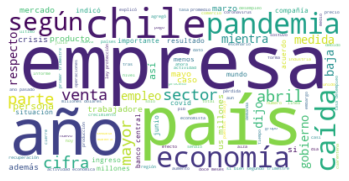

In [24]:
wc = ' '.join(pdata)
wcp = WordCloud(background_color="white").generate(wc)
plt.imshow(wcp, interpolation='bilinear')
plt.axis('off')
plt.show()

El siguiente paso es vectorizar las noticias. Para medir las frequencias de las palabras en cada texto se utilizará Tf-idf (*Term frequency – Inverse document frequency*). Según [Wikipedia](https://es.wikipedia.org/wiki/Tf-idf): Tf-idf es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras. 

El número máximo de palabras a utilizar se restringe a 1000, es decir, sólo se utilizaarán las 1.000 palabras más relevantes según Tf-idf. Además se quitarán los acentos a las palabras. De esta manera se obtiene un dataframe con 826 filas y 1000 columnas.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=1000,
                      strip_accents='unicode')
vdat = vect.fit_transform(pdata)
vdata = pd.DataFrame(vdat.toarray(), columns=vect.get_feature_names())
print(vdata.shape)

(826, 1000)


A continuación se muestran las palabras más y menos relevantes según el algoritmo aplicado.

In [26]:
mdata = vdata.mean(axis=0)
mdata = mdata.sort_values(ascending=False)
mdata = mdata.T

print('Palabras más relevantes: \n', mdata.head(10), '\n')
print('Palabras menos relevantes: \n', mdata.tail(10))

Palabras más relevantes: 
 millones     0.046518
ano          0.039872
pandemia     0.034732
trimestre    0.032419
crisis       0.031502
economia     0.031147
caida        0.030552
chile        0.029162
empresas     0.028504
personas     0.028188
dtype: float64 

Palabras menos relevantes: 
 calzado        0.002537
presentaron    0.002512
alla           0.002445
cae            0.002427
creo           0.002372
iniciativas    0.002364
silva          0.002299
acoto          0.002248
proporcion     0.002240
emol           0.002219
dtype: float64


Luego se crea un gráfico de frecuencia de palabras, usando los valores Tf-idf. Se aprecia un cambio respecto al gráfico anterior, ya que ahora destacan palabras como: millones, crisis, pandemia, caída, año, trimestre, economía.

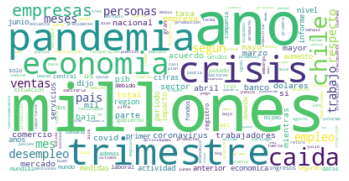

In [27]:
freqs = [(word, vdat.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
freqs = dict(freqs)

w = WordCloud(background_color='white').fit_words(freqs)
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

En la siguiente celda se calculan los clústeres para un número de clústeres entre 1 y 24. De esta forma se podrá determinar cuál es el número óptimo de clústeres.

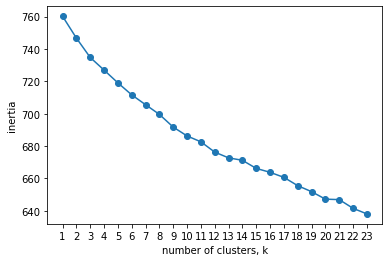

In [28]:
from sklearn.cluster import KMeans

# Seleccionar número de clústers para KMeans
ks = range(1, 24)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(vdata)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Según el gráfico anterior no hay un número claro de clústeres óptimo, por lo que se opta por utilizar 10 clústeres y evaluar los resultados gráficos.

In [29]:
# from sklearn.cluster import KMeans
K=10
kmeans = KMeans(n_clusters=K, random_state=1) 
kmeans.fit(vdata)

KMeans(n_clusters=10, random_state=1)

A continuación se muestra la base de datos original junto con las etiquetas asignadas a cada clúster.

In [30]:
dataset['cluster_labels'] = kmeans.predict(vdata)
dataset.head(10)

,month,year,fuente,sentimiento,response,empresa,texto,cluster_labels
0,4,2020.0,noticia,negativo,-1.0,.,Economía global anotaría en 2020 su peor año d...,0
1,4,2020.0,noticia,negativo,-1.0,.,Goldman Sachs prevé una crisis cuatro veces pe...,0
2,4,2020.0,noticia,positivo,1.0,.,Amazon logra su máxima cotización histórica en...,6
3,4,2020.0,noticia,negativo,-1.0,.,"Sin embargo, este incremento súbito del volume...",6
4,4,2020.0,noticia,positivo,1.0,.,Venta online de productos para mascotas aument...,6
5,4,2020.0,noticia,negativo,-1.0,.,"En ese escenario, y cuando el resentido sector...",6
6,4,2020.0,noticia,positivo,1.0,.,Diversas empresas consultadas por Emol dan cue...,8
7,4,2020.0,noticia,negativo,-1.0,.,Canales de TV abierta reportan fuerte deterior...,9
8,4,2020.0,noticia,negativo,-1.0,.,Efecto coronavirus: EE.UU. registra más de 22 ...,4
9,4,2020.0,noticia,negativo,-1.0,.,“Las ventas podrían ser insuficientes para la ...,1


Por último, se divide la base de datos según clúster y se vuelve a vectorizar y graficar la nube de palabras según Tf-idf. Así, se podrá verificar cuáles son las palabras más importantes de cada clúster.

Clúster 0 : 



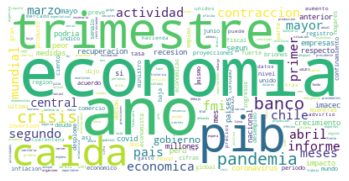

Clúster 1 : 



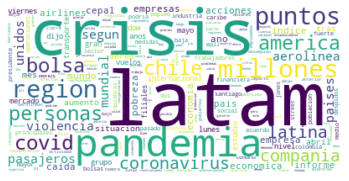

Clúster 2 : 



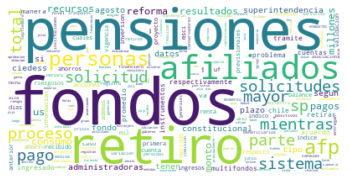

Clúster 3 : 



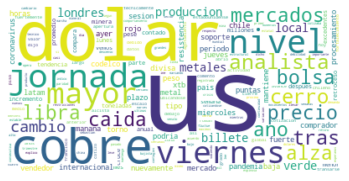

Clúster 4 : 



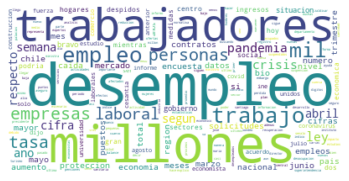

Clúster 5 : 



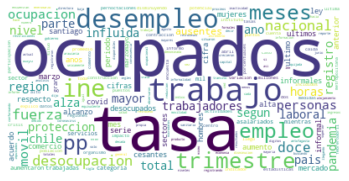

Clúster 6 : 



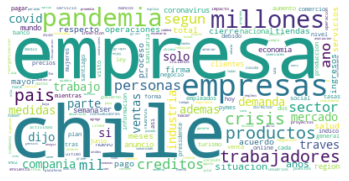

Clúster 7 : 



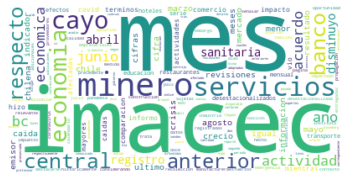

Clúster 8 : 



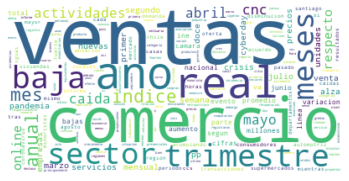

Clúster 9 : 



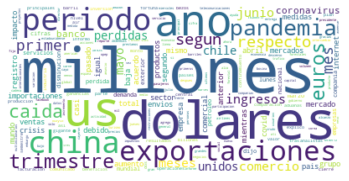

In [31]:
text = dataset['texto']

for k in range(K):
    
    print('Clúster %d :' % (k), '\n')
    
    dat = text[dataset['cluster_labels']==k]
    pdat = [preprocess(t) for t in dat]
    
    vect = TfidfVectorizer(max_features=1000, strip_accents='unicode')
    vdat = vect.fit_transform(pdat)
    dfdat = pd.DataFrame(vdat.toarray(), columns=vect.get_feature_names())
    
    freqs = [(word, vdat.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
    freqs = dict(freqs)

    w = WordCloud(background_color='white').fit_words(freqs)
    plt.imshow(w, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Se observan algunos patrones:
- Clúster 0: destacan palabras como economía, año, pib, trimestre, caída. En general palabras relacionadas con los indicadores de actividad económica.

- Clúster 1: destacan palabras como crisis, latam, pandemia. Se podría pensar que este clúster agrupa las noticias que informan sobre el efecto de la pandemia en Latinoamérica.

- Clúster 2: relacionado con los fondos de pensiones, ya que destacan palabras como pensiones, fondos, afiliados, retiro.

- Clúster 3: relacionado con los mercados financieros internacionales, ya que destacan palabras como dólar, US, cobre, jornada, nivel.

- Clúster 4: destacan palabras como trabajadores, desempleo, millones, empleo, trabajo. Claramente relacionado con las noticias del mercado laboral.

- Clúster 5: otro clúster con noticias del mercado laboral, ya que agrupa palabras como ocupados, trabajo, tasa, desempleo. 

- Clúster 6: destacan palabras como Chile, empresa, pandemia, trabajadores.

- Clúster 7: destacan palabras como imacec, mes, minero, servicios, lo que sugiere relación con los indicadores mensuales de actividad económica.

- Clúster 8: sobresalen palabras como comercio, ventas, sector. Probablemente se trata de noticias sobre el sector comercio en Chile.

- Clúster 9: aparentemente relacionado con el comercio internacional, ya que destacan palabras como millones, dólares, us, china, exportaciones.